In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
from pathlib import Path  # Make sure Path is imported

warnings.filterwarnings('ignore')

# Initialize lists for file paths and labels
paths = []
labels = []

# Directory path where your TESS dataset is stored
dataset_dir = Path(r'C:\Users\Singh Computers\Desktop\Deep-Learning-Projects\Speech Emotion Recognition - Sound Classification\TESS Toronto emotional speech set data')

# Walk through the dataset directory to collect paths and labels
for filepath in dataset_dir.rglob('*.wav'):
    paths.append(str(filepath))
    # Extract label from filename
    label = filepath.stem.split('_')[-1].lower()  # Get emotion from filename
    labels.append(label)

print(f'Dataset is Loaded with {len(paths)} audio files')


Dataset is Loaded with 5600 audio files


In [2]:
len(paths)

5600

In [3]:
paths[:5]

['C:\\Users\\Singh Computers\\Desktop\\Deep-Learning-Projects\\Speech Emotion Recognition - Sound Classification\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'C:\\Users\\Singh Computers\\Desktop\\Deep-Learning-Projects\\Speech Emotion Recognition - Sound Classification\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'C:\\Users\\Singh Computers\\Desktop\\Deep-Learning-Projects\\Speech Emotion Recognition - Sound Classification\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'C:\\Users\\Singh Computers\\Desktop\\Deep-Learning-Projects\\Speech Emotion Recognition - Sound Classification\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'C:\\Users\\Singh Computers\\Desktop\\Deep-Learning-Projects\\Speech Emotion Recognition - Sound Classification\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [4]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

                                              speech  label
0  C:\Users\Singh Computers\Desktop\Deep-Learning...  angry
1  C:\Users\Singh Computers\Desktop\Deep-Learning...  angry
2  C:\Users\Singh Computers\Desktop\Deep-Learning...  angry
3  C:\Users\Singh Computers\Desktop\Deep-Learning...  angry
4  C:\Users\Singh Computers\Desktop\Deep-Learning...  angry
label
angry      800
disgust    800
fear       800
happy      800
neutral    800
ps         800
sad        800
Name: count, dtype: int64


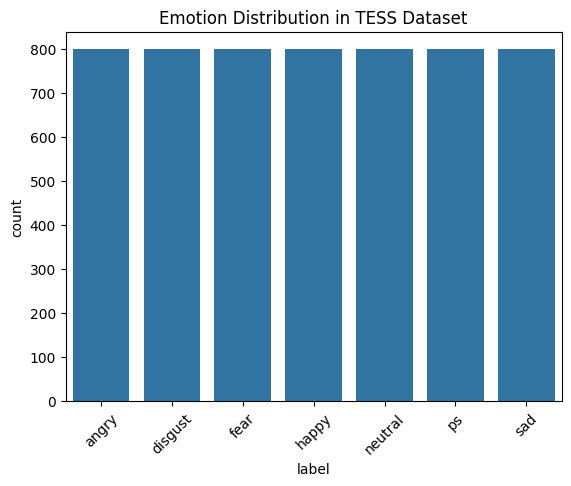

In [5]:
# Create a DataFrame
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels

# Display the first few rows
print(df.head())

# Display the count of each label (emotion)
print(df['label'].value_counts())

# Visualize the distribution of labels using a countplot
sns.countplot(data=df, x='label')
plt.title('Emotion Distribution in TESS Dataset')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()


In [6]:
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Function to plot the waveform of the audio signal
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(f"Waveform of {emotion}", size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

# Function to plot the spectrogram (frequency vs time)
def spectrogram(data, sr, emotion):
    # Compute the Short-Time Fourier Transform (STFT)
    x = librosa.stft(data)
    
    # Convert the amplitude to decibels
    xdb = librosa.amplitude_to_db(abs(x))
    
    # Plot the spectrogram
    plt.figure(figsize=(11, 4))
    plt.title(f"Spectrogram of {emotion}", size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Time (s)')
    plt.show()


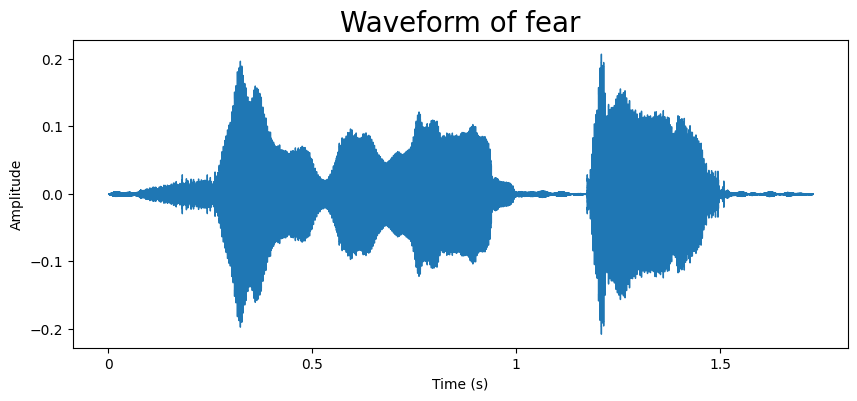

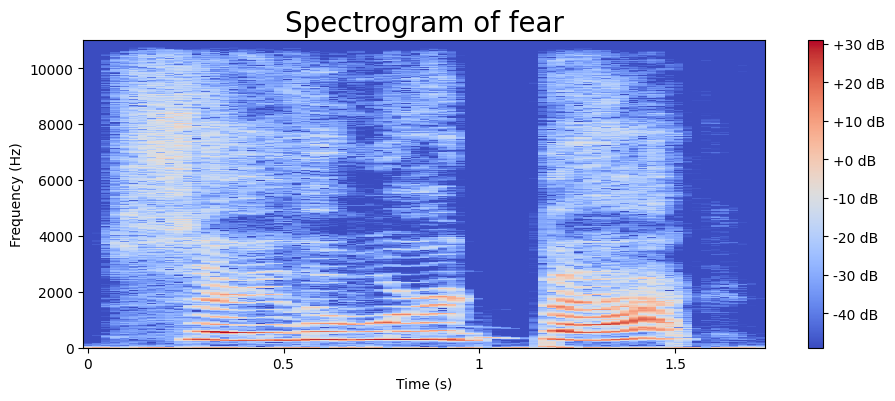

In [7]:
emotion = 'fear'  # Choose the emotion you want to visualize
path = np.array(df['speech'][df['label'] == emotion])[0]  # Get the file path for that emotion

# Load the audio file
data, sampling_rate = librosa.load(path)

# Visualize the waveform and spectrogram
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)

# Play the audio
Audio(path)


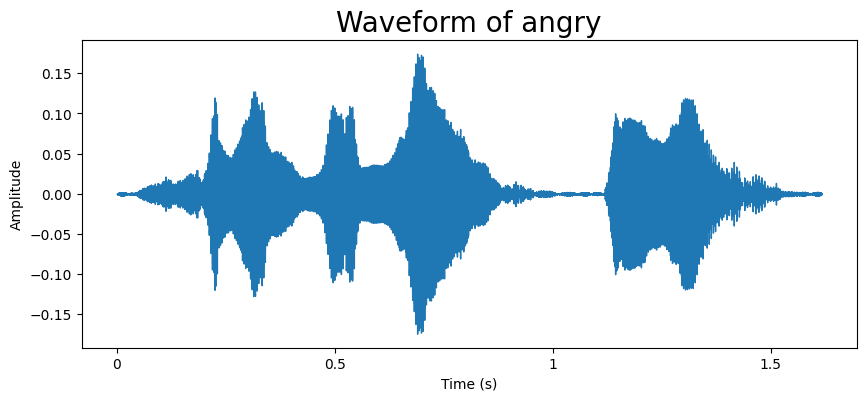

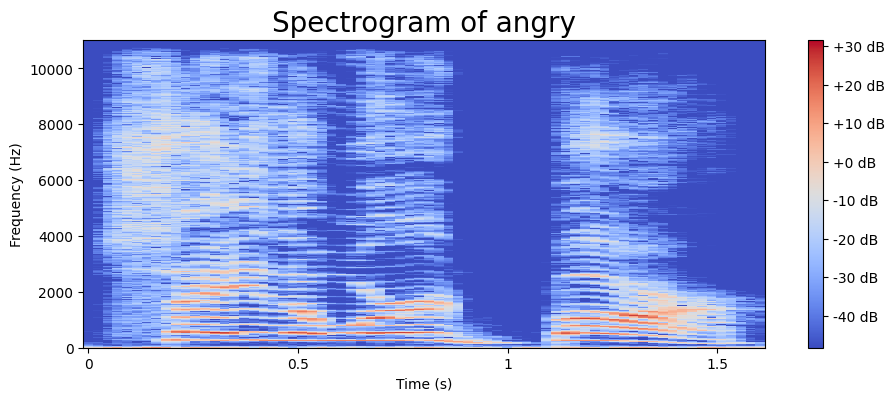

In [8]:
emotion = 'angry'
path = np.array(df['speech'][df['label'] == emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

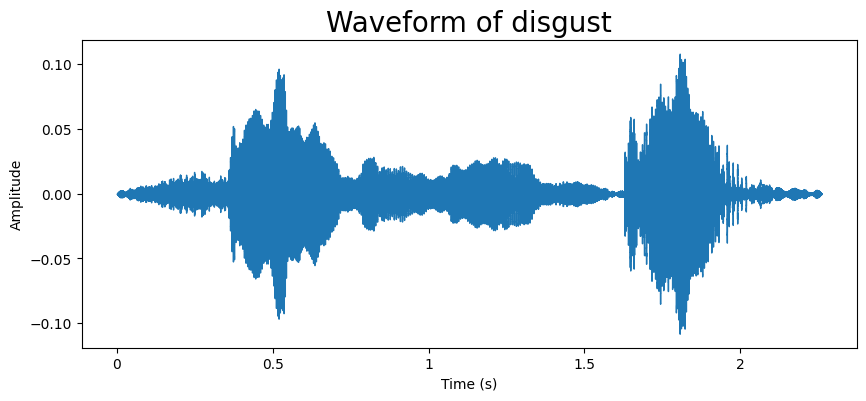

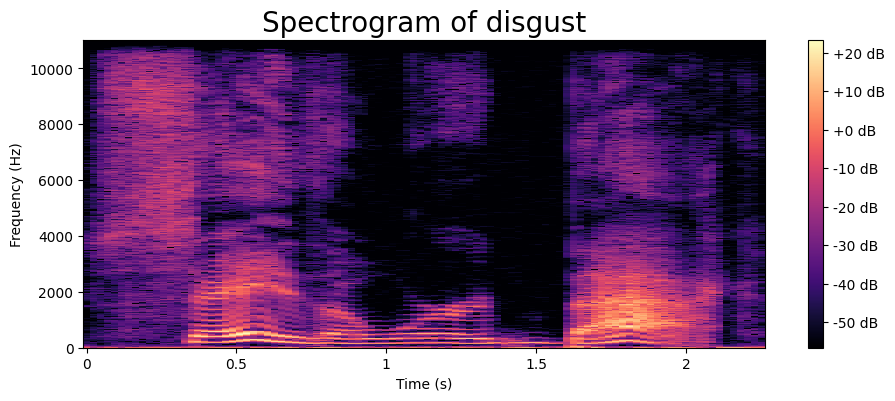

In [9]:
emotion = 'disgust'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)



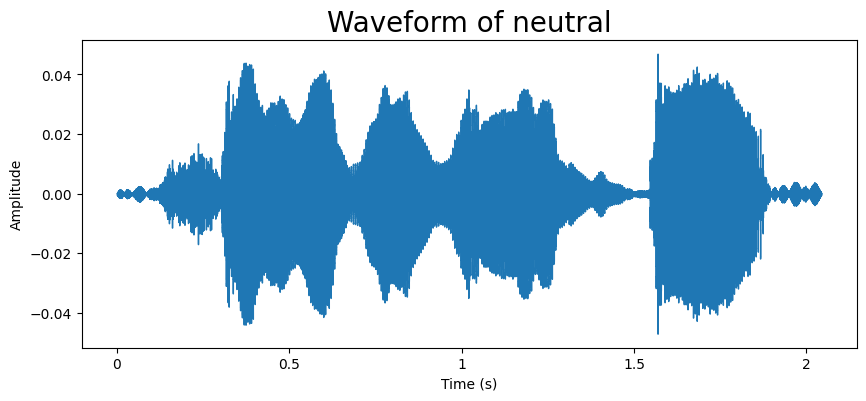

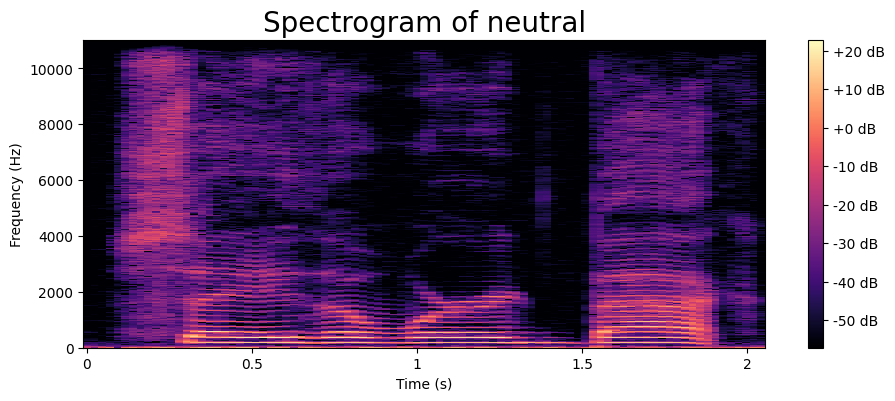

In [10]:
# Neutral
emotion = 'neutral'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

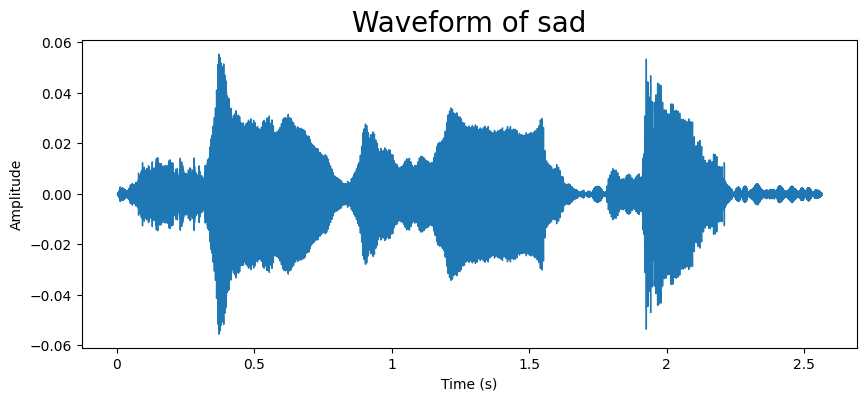

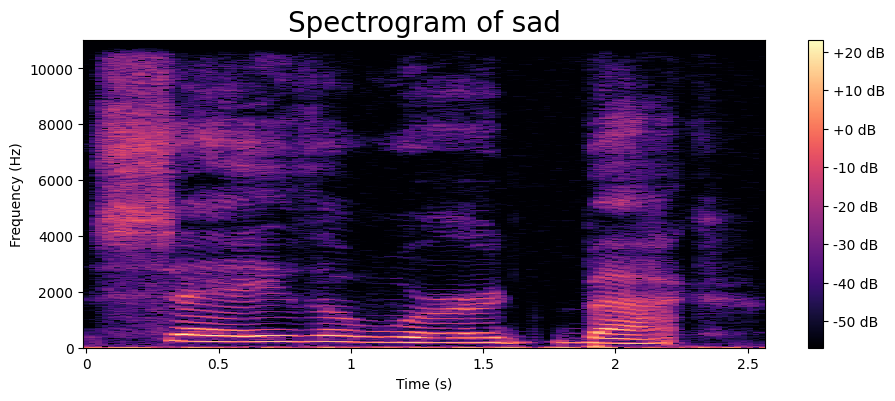

In [11]:
emotion = 'sad'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

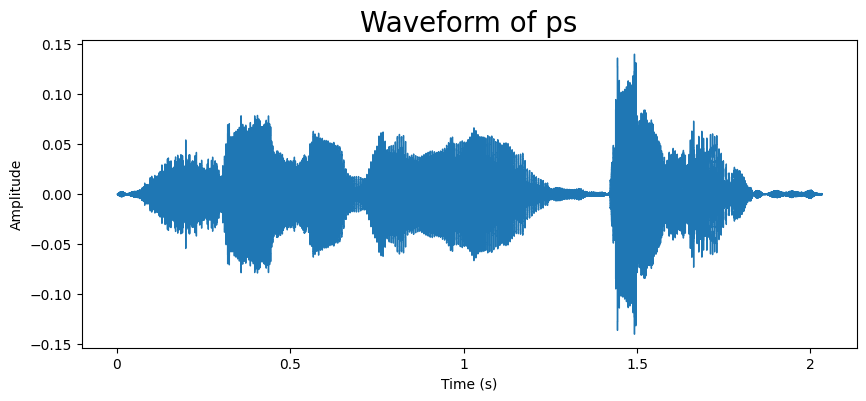

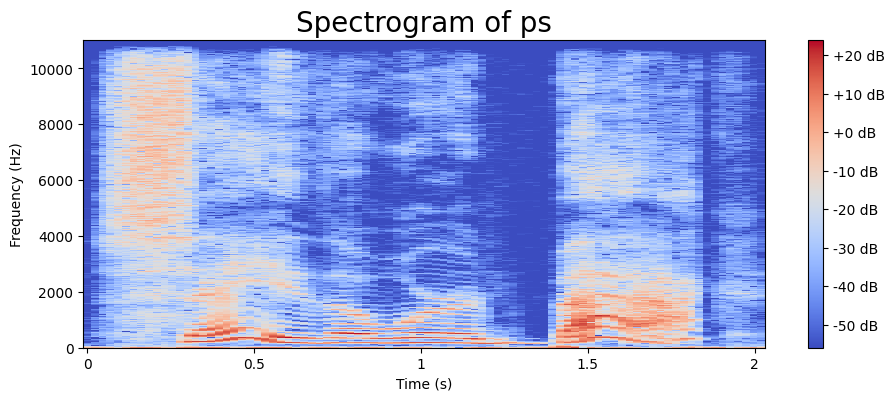

In [12]:
emotion = 'ps'  # Check this against df['label'].unique()
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

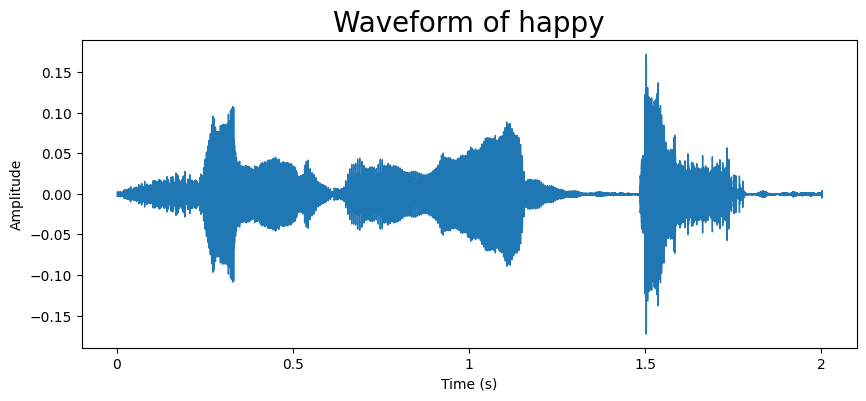

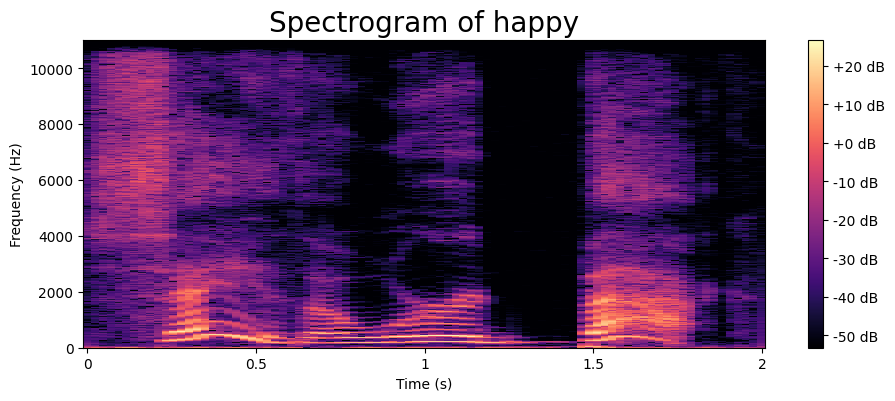

In [13]:
emotion = 'happy'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

In [14]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)  # Load 3 seconds of audio starting at 0.5s
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)  # Compute MFCCs and take the mean
    return mfcc


In [15]:
extract_mfcc(df['speech'][0])

array([-3.9698621e+02,  7.7440536e+01, -1.9592791e+01, -2.1666689e+01,
       -2.1127560e+00,  1.0075363e+01, -2.0366707e+01, -6.0924492e+00,
       -7.2122831e+00, -5.5736625e-01, -1.8325533e+00,  2.0210145e-01,
        7.2755075e-01,  1.3177377e+00,  2.8863375e+00,  2.8557906e+00,
       -4.7129216e+00, -4.4365110e+00, -1.6211592e+00, -1.0239839e+01,
       -7.5512629e+00, -1.7968802e+00, -7.0376525e+00,  9.4365845e+00,
        8.3558550e+00,  2.1712360e+01,  1.9216991e+01,  2.0348930e+01,
        1.3413366e+01,  8.3391724e+00,  3.9472228e-01,  5.1113148e+00,
        9.5687389e+00,  5.4548683e+00,  2.5099638e+00, -1.8239073e+00,
        4.8689618e+00,  9.3139238e+00,  2.0891502e+00, -1.9064914e+00],
      dtype=float32)

In [16]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [17]:
X_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.6560086, -32.74544, -...
2       [-429.79196, 46.12401, 1.5550478, -0.21709442,...
3       [-403.46118, 76.32369, -12.531775, -22.288858,...
4       [-434.05756, 77.4455, 10.865501, 16.092945, 8....
                              ...                        
5595    [-406.48053, 80.379875, 32.462395, 46.579094, ...
5596    [-426.90918, 102.54756, 24.800041, 43.048096, ...
5597    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
5598    [-434.8618, 89.906364, 28.373262, 39.577065, -...
5599    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: speech, Length: 5600, dtype: object

In [18]:

X = [x for x in X_mfcc]     # Converts the Series into a list of arrays
X = np.array(X)             # Converts the list into a 2D NumPy array
X.shape                     # Should print the shape (2800, 40)


(5600, 40)

In [19]:
## input split
X = np.expand_dims(X, -1)
X.shape

(5600, 40, 1)

In [20]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [21]:
y = y.toarray()

In [22]:
import joblib
joblib.dump(enc, 'encoder.joblib')
print("Encoder saved as 'encoder.joblib'")

Encoder saved as 'encoder.joblib'


In [23]:
y.shape

(5600, 7)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [25]:


model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)




Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 256)            │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64, 
                    callbacks=[early_stopping])

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - accuracy: 0.5126 - loss: 1.2840 - val_accuracy: 0.8634 - val_loss: 0.3782
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - accuracy: 0.8936 - loss: 0.3202 - val_accuracy: 0.9554 - val_loss: 0.1340
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 160ms/step - accuracy: 0.9197 - loss: 0.2360 - val_accuracy: 0.9848 - val_loss: 0.0653
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - accuracy: 0.9613 - loss: 0.1164 - val_accuracy: 0.9812 - val_loss: 0.0586
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.9708 - loss: 0.0912 - val_accuracy: 0.9750 - val_loss: 0.0803
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.9725 - loss: 0.0880 - val_accuracy: 0.9795 - val_loss: 0.0594
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 136ms/step - accuracy: 0.9806 - loss: 0.0651 - val_accuracy: 0.9500 - val_loss: 0.1227
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 146ms/step - accuracy: 0.9786 - loss: 0.0678 - val_accurac

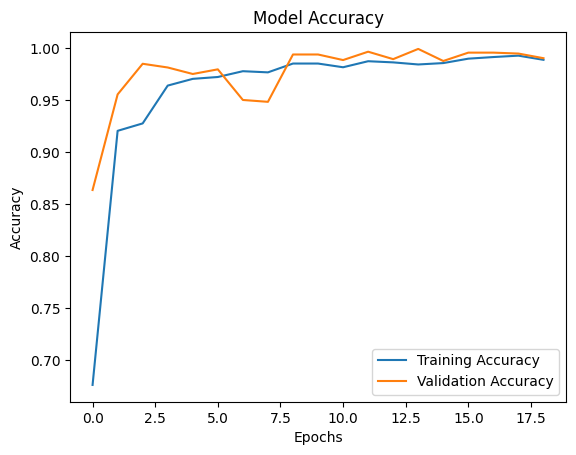

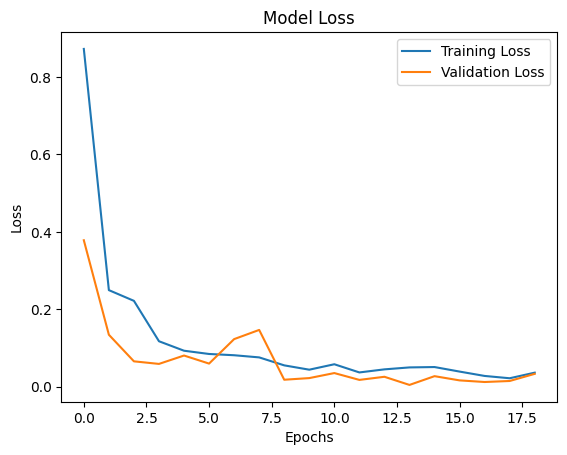

In [27]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [28]:
# Save the trained model
model.save('emotion_recognition_model.h5')  # The model is saved as a .h5 file


In [35]:
from sklearn.preprocessing import OneHotEncoder
import librosa
import numpy as np
from keras.models import load_model

# Assuming you already have the trained model from earlier
model = load_model('emotion_recognition_model.h5')

# OneHotEncoder used during training
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])
y = y.toarray()

# Function to extract MFCC from a single audio file
def extract_mfcc(filename, duration=3, offset=0.5):
    y, sr = librosa.load(filename, duration=duration, offset=offset)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)  # 40 MFCC features
    return mfcc

# Function to make a prediction on a new audio file
def predict_emotion(audio_path):
    # Extract MFCC from the audio
    mfcc = extract_mfcc(audio_path)
    
    # Reshape the MFCC to match the model input shape (1 sample, 40 features, 1)
    mfcc = np.expand_dims(mfcc, axis=-1)  # (40, 1)
    mfcc = np.expand_dims(mfcc, axis=0)   # (1, 40, 1)
    
    # Predict emotion
    prediction = model.predict(mfcc)
    
    # Decode the prediction (get the label corresponding to the highest probability)
    predicted_class = np.argmax(prediction, axis=1)  # Get the index of the highest probability
    predicted_one_hot = np.zeros_like(prediction)    # Create a zero array for one-hot encoding
    predicted_one_hot[0, predicted_class] = 1        # Set the predicted class index to 1
    
    # Inverse transform to get the corresponding label
    emotion = enc.inverse_transform(predicted_one_hot)  # Convert the one-hot back to emotion label
    
    return emotion[0], prediction[0]  # Return the predicted emotion and the probability distribution

# Test the model on a sample audio file
audio_path = r'C:\Users\Singh Computers\Desktop\Deep-Learning-Projects\Speech Emotion Recognition - Sound Classification\52-vozhombreenojado-46952.mp3'
 # Replace with the path to your audio file
emotion, probabilities = predict_emotion(audio_path)

# Print the result
print(f"Predicted Emotion: {emotion}")
print(f"Prediction Probabilities: {probabilities}")
emotion_labels = ['anger', 'disgust', 'fear', 'happiness', 'neutral', 'pleasant surprise', 'sadness']



predicted_index = np.argmax(probabilities)

# Get the corresponding predicted emotion label
predicted_emotion = emotion_labels[predicted_index]


print("\nPrediction Probabilities for Each Emotion:")
for label, prob in zip(emotion_labels, probabilities):
    print(f"{label}: {prob:.6f}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
Predicted Emotion: ['disgust']
Prediction Probabilities: [1.2999885e-04 9.9904078e-01 8.8286271e-07 2.3101971e-05 9.7062912e-06
 4.3682559e-04 3.5865506e-04]

Prediction Probabilities for Each Emotion:
anger: 0.000130
disgust: 0.999041
fear: 0.000001
happiness: 0.000023
neutral: 0.000010
pleasant surprise: 0.000437
sadness: 0.000359
